In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm

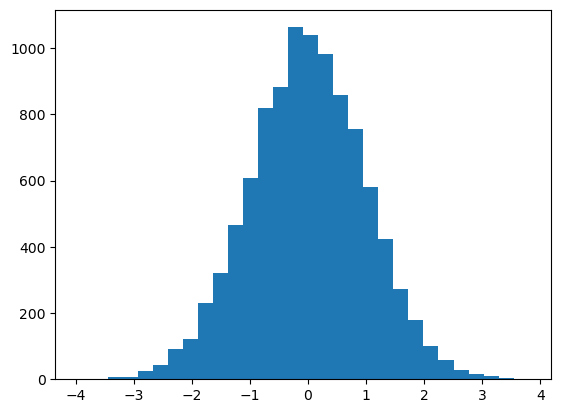

In [14]:
sample = normal(size=10000) # generador aleatorio basado en la distribución normal
plt.hist(sample, bins=30) 
plt.show()

## Estimación paramétrica

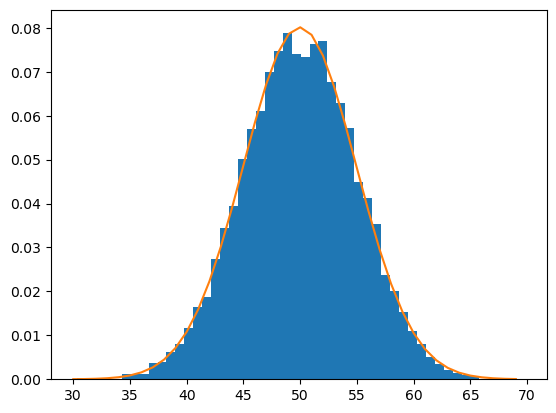

In [18]:
sample = normal(loc=50, scale=5, size=10000) # loc=mean scale=std
mu = sample.mean()
sigma = sample.std()

dist_norm = norm(mu, sigma)

val_x = np.arange(30,70)
val_y = [dist_norm.pdf(val) for val in val_x]

plt.hist(sample, bins=50, density=True)
plt.plot(val_x, val_y)

## Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter (bandwidth)
* [función base]: basis function (kernel)

https://scikit-learn.org/stable/modules/density.html


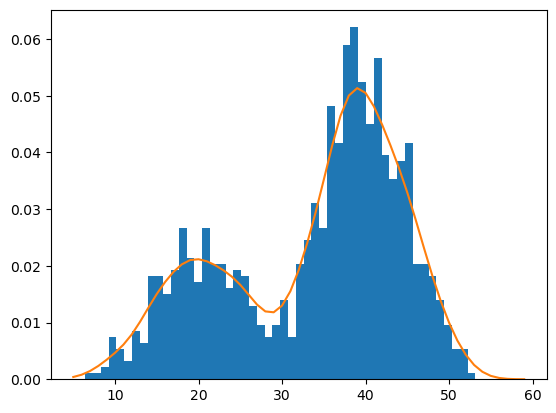

In [113]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# Modelo KernelDensity - Creado artificialmente
kdensity_model = KernelDensity(kernel='gaussian', bandwidth=2)
value = sample.reshape(len(sample), 1)
kdensity_model.fit(value)

plt.hist(value, bins=50, density=True)
# Simulado teorico
val_x = np.asarray([values for values in range(5,60)])
val_x = val_x.reshape(len(val_x), 1)
prob_val_x = kdensity_model.score_samples(val_x)  # probabilidad logarítmica / 
prob_val_x = np.exp(prob_val_x) # inversión de probabilidad

plt.plot(val_x, prob_val_x)